# 1. Download and Load the Dataset:

In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv('online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 2. Data Preprocessing:
Before diving into the analysis, we must ensure our data is clean and well-structured. This
involves handling missing values and converting data types if needed.
• Handle missing values, if any.
• Convert data types if necessary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print('No. of missing values: {}. \n'.format(missing_values))

No. of missing values: Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64. 



In [6]:
# Handle missing values (example: removing rows with missing values)
data = data.dropna()

In [7]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 3. RFM Calculation
RFM stands for <b>Recency, Frequency, and Monetary value.</b> These metrics help us understand
customer behavior. We'll calculate these metrics for each customer.

In [28]:
x= data.groupby('Customer ID')
x.count()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
Customer ID,,,,,,,
12346.0,48,48,48,48,48,48,48
12347.0,253,253,253,253,253,253,253
12348.0,51,51,51,51,51,51,51
12349.0,180,180,180,180,180,180,180
12350.0,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...
18283.0,986,986,986,986,986,986,986
18284.0,29,29,29,29,29,29,29
18285.0,12,12,12,12,12,12,12


In [35]:
data.groupby('Customer ID').agg({
         'InvoiceDate': lambda x: (today - x.max()).days,
         'Invoice': 'nunique',
         'Price': 'sum'
          
}).reset_index


<bound method DataFrame.reset_index of              InvoiceDate  Invoice    Price
Customer ID                               
12346.0             4593       17   580.44
12347.0             4270        8   644.16
12348.0             4343        5   193.10
12349.0             4286        5  1504.59
12350.0             4578        1    65.30
...                  ...      ...      ...
18283.0             4271       22  1719.75
18284.0             4697        2   116.09
18285.0             4928        1   100.20
18286.0             4744        3   306.55
18287.0             4310        8   348.89

[5942 rows x 3 columns]>

In [12]:
today = datetime(2023, 8, 17) # Update with the current date

rfm_data = data.groupby('Customer ID').agg({
         'InvoiceDate': lambda x: (today - x.max()).days,
         'Invoice': 'nunique',
         'Price': 'sum'
          }).reset_index()

rfm_data

,Customer ID,InvoiceDate,Invoice,Price
0,12346.0,4593,17,580.44
1,12347.0,4270,8,644.16
2,12348.0,4343,5,193.10
3,12349.0,4286,5,1504.59
4,12350.0,4578,1,65.30
...,...,...,...,...
5937,18283.0,4271,22,1719.75
5938,18284.0,4697,2,116.09
5939,18285.0,4928,1,100.20
5940,18286.0,4744,3,306.55


In [36]:
from datetime import datetime

# Calculate recency, frequency, and monetary values
today = datetime(2023, 8, 17) # Update with the current date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
rfm_data = data.groupby('Customer ID').agg({
         'InvoiceDate': lambda x: (today - x.max()).days,
         'Invoice': 'nunique',
         'Price': 'sum'
          }).reset_index()
# rfm_data
# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,4593,17,580.44
1,12347.0,4270,8,644.16
2,12348.0,4343,5,193.10
3,12349.0,4286,5,1504.59
4,12350.0,4578,1,65.30


# 4. Feature Scaling:

Scale the RFM features to have similar scales.
The code utilizes StandardScaler to normalize the RFM (Recency, Frequency, Monetary) metrics, ensuring uniform scale for accurate analysis. Key points include: StandardScaler is applied to `Recency,` `Frequency,` and `Monetary` columns individually. Scaled values are organized into rfm_scaled_df DataFrame.

Feature scaling enhances data consistency and aids in unbiased analysis or modeling.


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency','Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,0.578405,0.591554,0.036716
1,-0.946162,0.028030,0.069977
2,-0.601600,-0.159812,-0.165470
3,-0.870642,-0.159812,0.519110
4,0.507605,-0.410267,-0.232180


# 5. K-Means Clustering

Determine the optimal number of clusters using techniques like the Elbow Method or Silhouette Score.

Perform K-Means clustering.

In [39]:
import warnings
# Disable all warnings

warnings.filterwarnings("ignore")
# # Re-enable warnings
# warnings.resetwarnings()

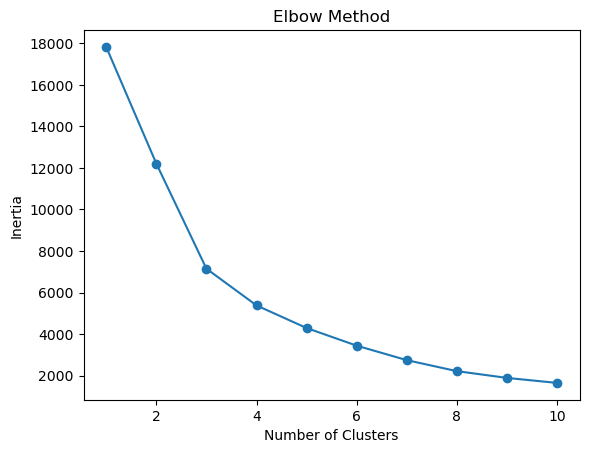

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,4593,17,580.44,0
1,12347.0,4270,8,644.16,1
2,12348.0,4343,5,193.10,1
3,12349.0,4286,5,1504.59,1
4,12350.0,4578,1,65.30,0


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal number of clusters using the Elbow Method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., from the elbow point or Silhouette Score)
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_data.head()


# 6. Visualization
Visualize the clusters and their characteristics

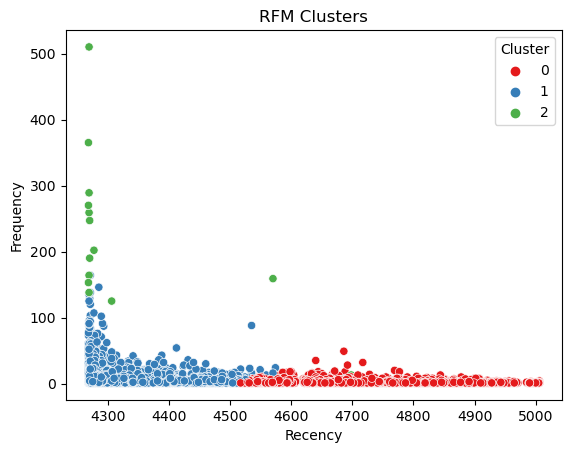

In [44]:
import seaborn as sns
# Visualize the clusters
sns.scatterplot(data=rfm_data, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title('RFM Clusters')
plt.show()

The RFM clustering results show that there are three distinct clusters of customers:

Cluster 0: These customers are the most recent and frequent buyers, and they also have
the highest monetary value. They are the most valuable customers to the business, and
they should be targeted with marketing campaigns that encourage them to continue
spending.

Cluster 1: These customers are less recent than Cluster 0, but they are still relatively
frequent buyers. They have a lower monetary value than Cluster 0, but they are still
valuable customers. They should be targeted with marketing campaigns that encourage
them to increase their spending.

Cluster 2: These customers are the least recent and frequent buyers, and they also have
the lowest monetary value. They are the least valuable customers to the business, and
they may be at risk of churning. They should be targeted with marketing campaigns that
encourage them to become more active.

The following table summarizes the characteristics of the three clusters:

Cluster   |       Recency    |    Frequency   |    Monetary     |     Value

0                 High           High            High              High

1                 Medium         Medium          Medium            Medium

2                 Low            Low             Low               Low
 
